Open statement/Introduction

In an endeavour to refine the art of predicting Major League Baseball outcomes, a meticulous analysis utilizing data from the 2014 season aims to forecast the number of wins for the 2015 season. Leveraging 16 distinct features encapsulating various aspects of game performance, this project employs advanced machine-learning techniques to model the intricacies of baseball success. The culmination of exploratory data analysis, feature engineering, and rigorous model evaluation is the foundation for developing an algorithm poised to offer insights into the dynamics of team victories.

1. Import Required Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

2. Load dataset using pandas

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv'
df = pd.read_csv(url)

2. Exploratory Data Analysis (EDA) and Preprocessing

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are 17 columns in total, each representing a different variable or feature of the data. The features include various statistics, presumably related to a sports context given the nature of the column names (e.g., runs, hits, home runs).

The DataFrame's columns are predominantly of the integer type (int64), with 16 columns falling under this category. There is one column with a floating-point data type (float64), specifically the ERA column.

All columns have 30 non-null entries, which means there are no missing values in the dataset for any of the columns. Each feature has a value for every one of the 30 items in the DataFrame.

In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


The dataset covers baseball team performance metrics for 30 teams, with averages suggesting balanced performance, e.g., average wins at approximately 81.

Performance varies widely among teams, as seen in the range of wins (63 to 100) and runs scored (573 to 891).

Median values indicate that half of the teams have up to 81 wins and score around 689 runs, with significant differences between the top and bottom quartiles in offensive metrics.

Pitching and defensive stats like ERA average around 3.96, with notable variability in team performance indicated by standard deviations and the range of values across metrics like shutouts and errors.

In [6]:
# Missing values
print(df.isnull().sum())

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


No miss enteries found across dataset

In [7]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:")
print(numerical_cols)

Numerical columns:
Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')


3. Visualization of distribution of data variables

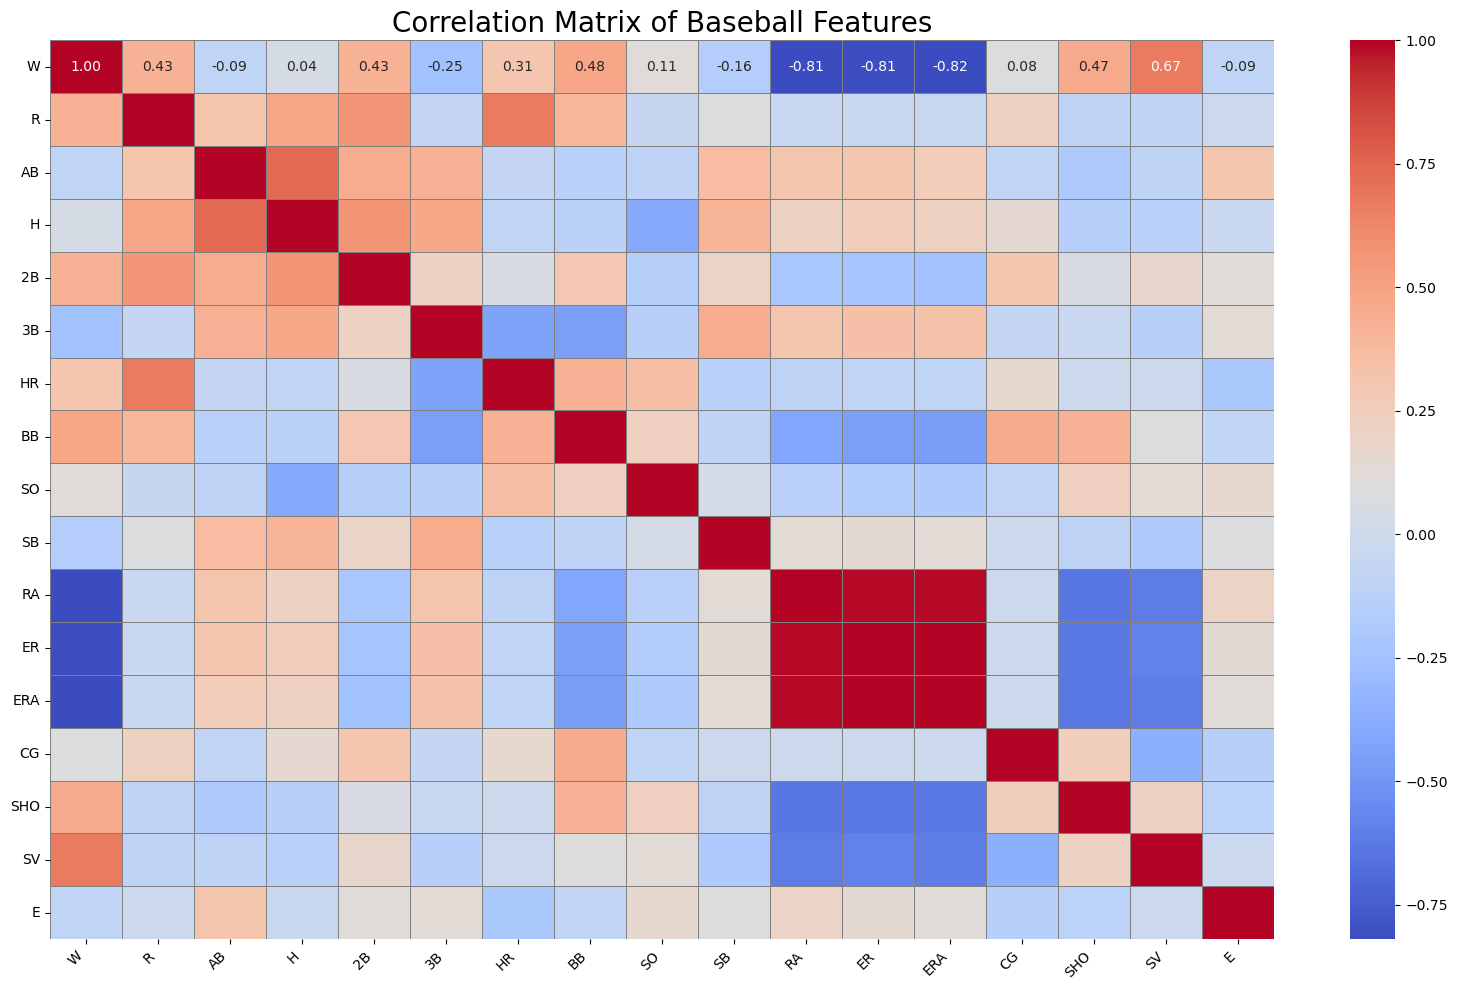

In [8]:
#  Generating the Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='gray')

plt.title('Correlation Matrix of Baseball Features', fontsize=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

Wins (W) are positively correlated with runs scored (R), home runs (HR), and walks (BB), suggesting that teams that score more runs, hit more home runs, and draw more walks tend to win more games.

Wins are negatively correlated with runs allowed (RA), earned runs (ER), and errors (E), indicating that allowing fewer runs and committing fewer errors is associated with more wins.

There is a strong negative correlation between shutouts (SHO) and both runs allowed and earned runs, which aligns with the notion that pitching shutouts typically results in fewer runs being scored against a team.

Stolen bases (SB) show little to no correlation with wins, suggesting that this statistic is not a strong indicator of a team's success relative to the other metrics provided.

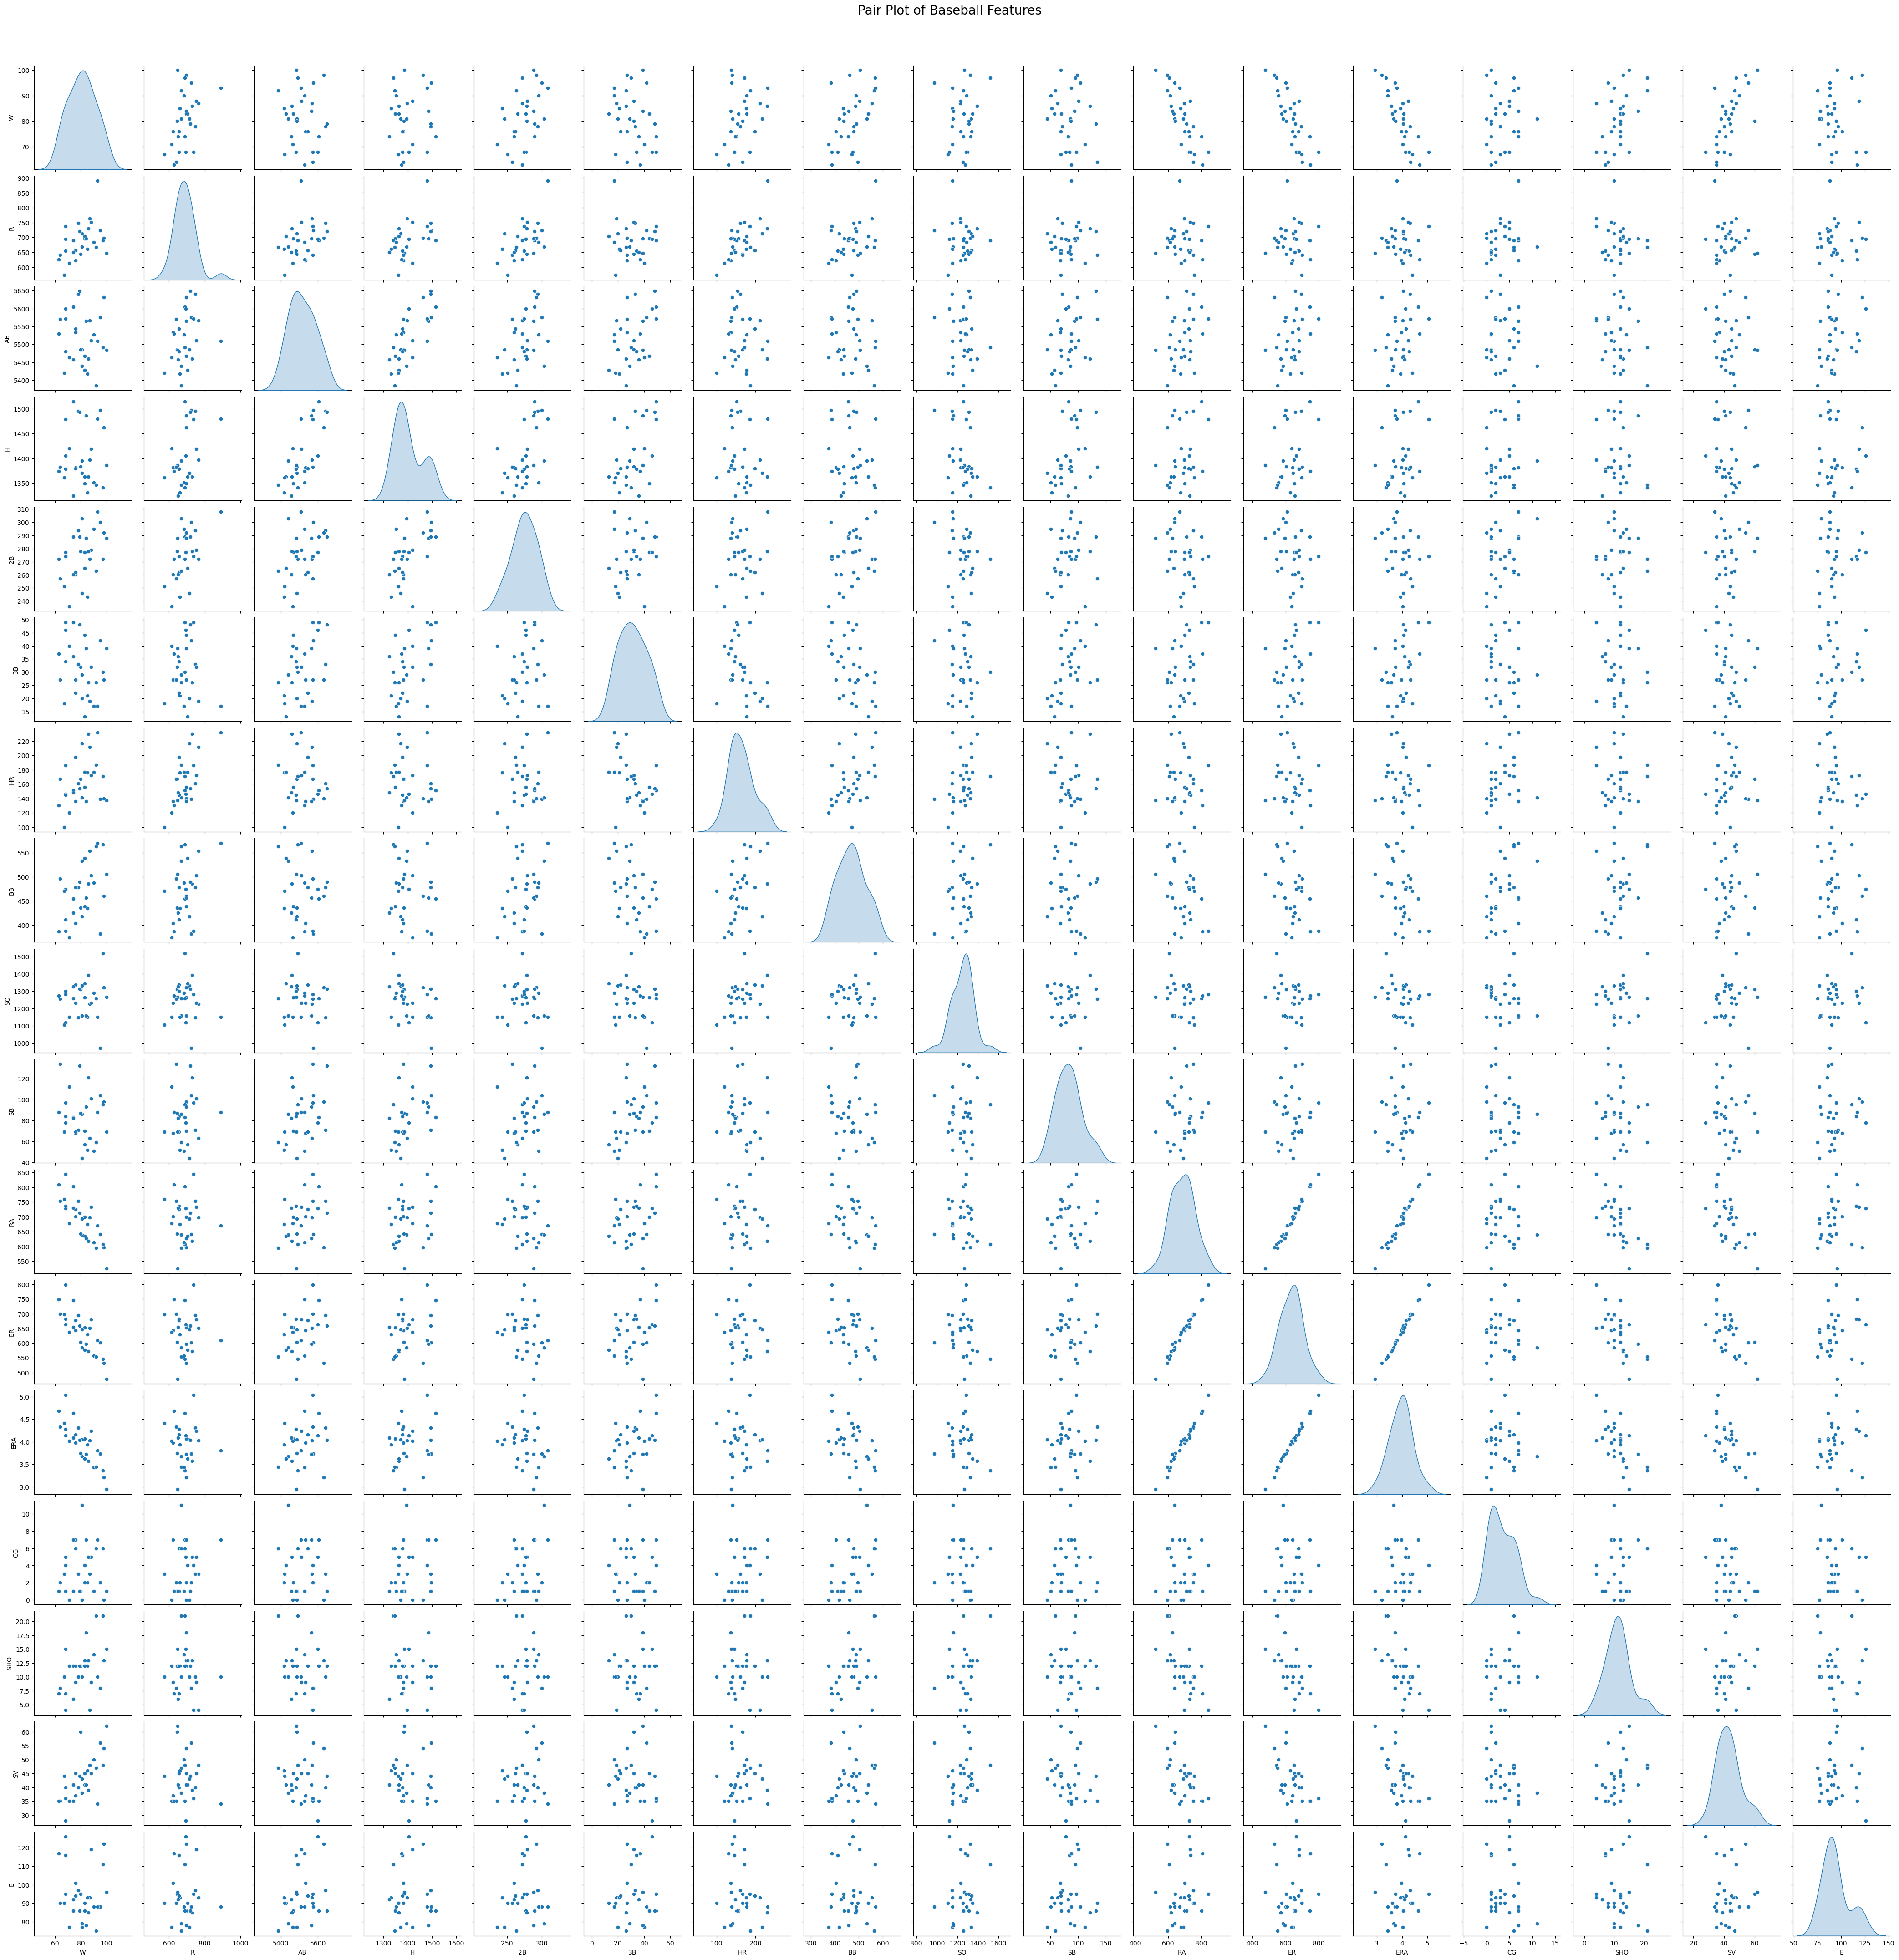

In [9]:
# Pair Plot of Baseball Features
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pair Plot of Baseball Features", size=20, y=1.02)
plt.show()

Scatterplots illustrate relationships between pairs of variables. A pattern trending upwards indicates a positive correlation, while a downward trend indicates a negative correlation. A lack of discernible pattern would suggest little to no correlation.

Any points that fall far from the general cluster of data points may be outliers and could be subject to further investigation for data accuracy or exceptional cases.

The density of points in the scatterplots shows how often certain combinations of variable values occur. Areas with many points close together indicate common value combinations, while sparser areas show less common combinations.

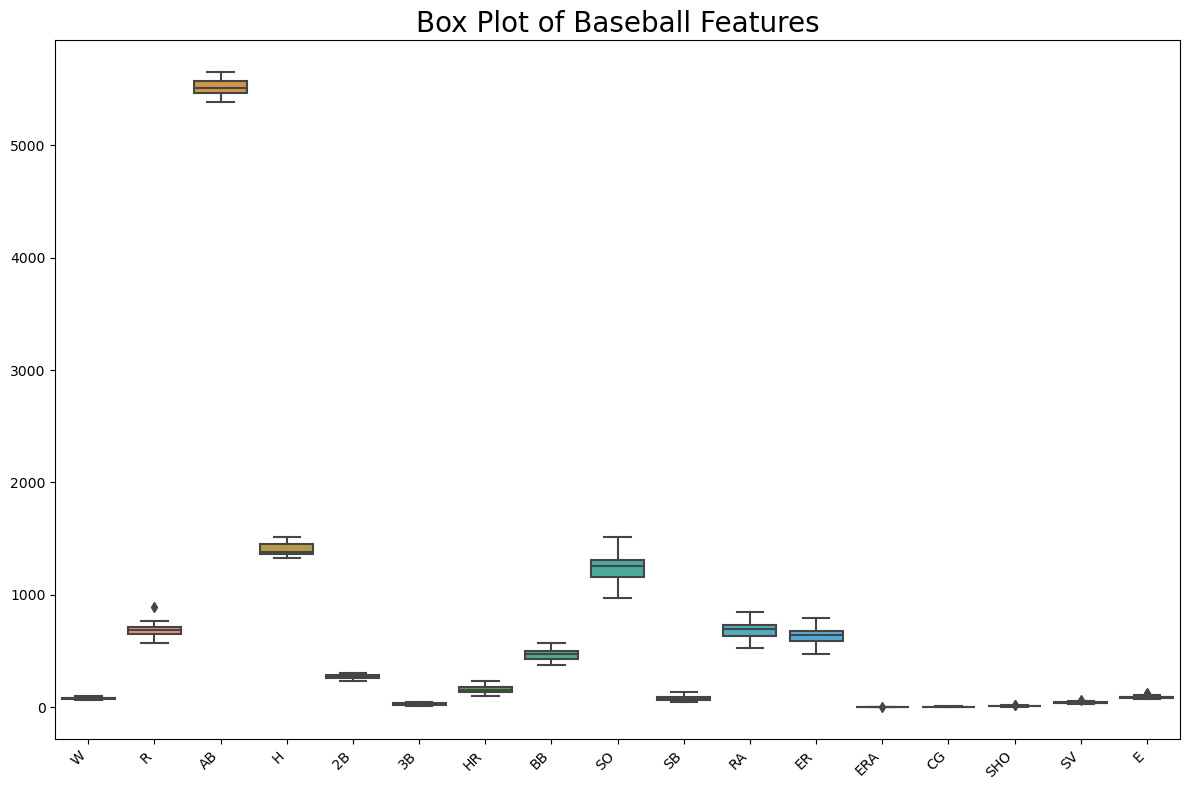

In [10]:
#  Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha="right")
plt.title("Box Plot of Baseball Features", fontsize=20)
plt.tight_layout()
plt.show()

Some features have a wide range of values indicated by larger boxes, such as 'AB' (at bats), while others like 'E' (errors) have a more concentrated range.

The line within each box represents the median of the dataset. The positioning of the median line can indicate skewness; if it's closer to the top or bottom of the box, it suggests skewness in the data.

Some features show outliers as individual points outside the "whiskers" of the plots, indicating exceptionally high or low values compared to the rest of the data.

The height of each box represents the IQR, which is the spread of the middle 50% of the data. A taller box indicates more variability in the central portion of the data for that feature.

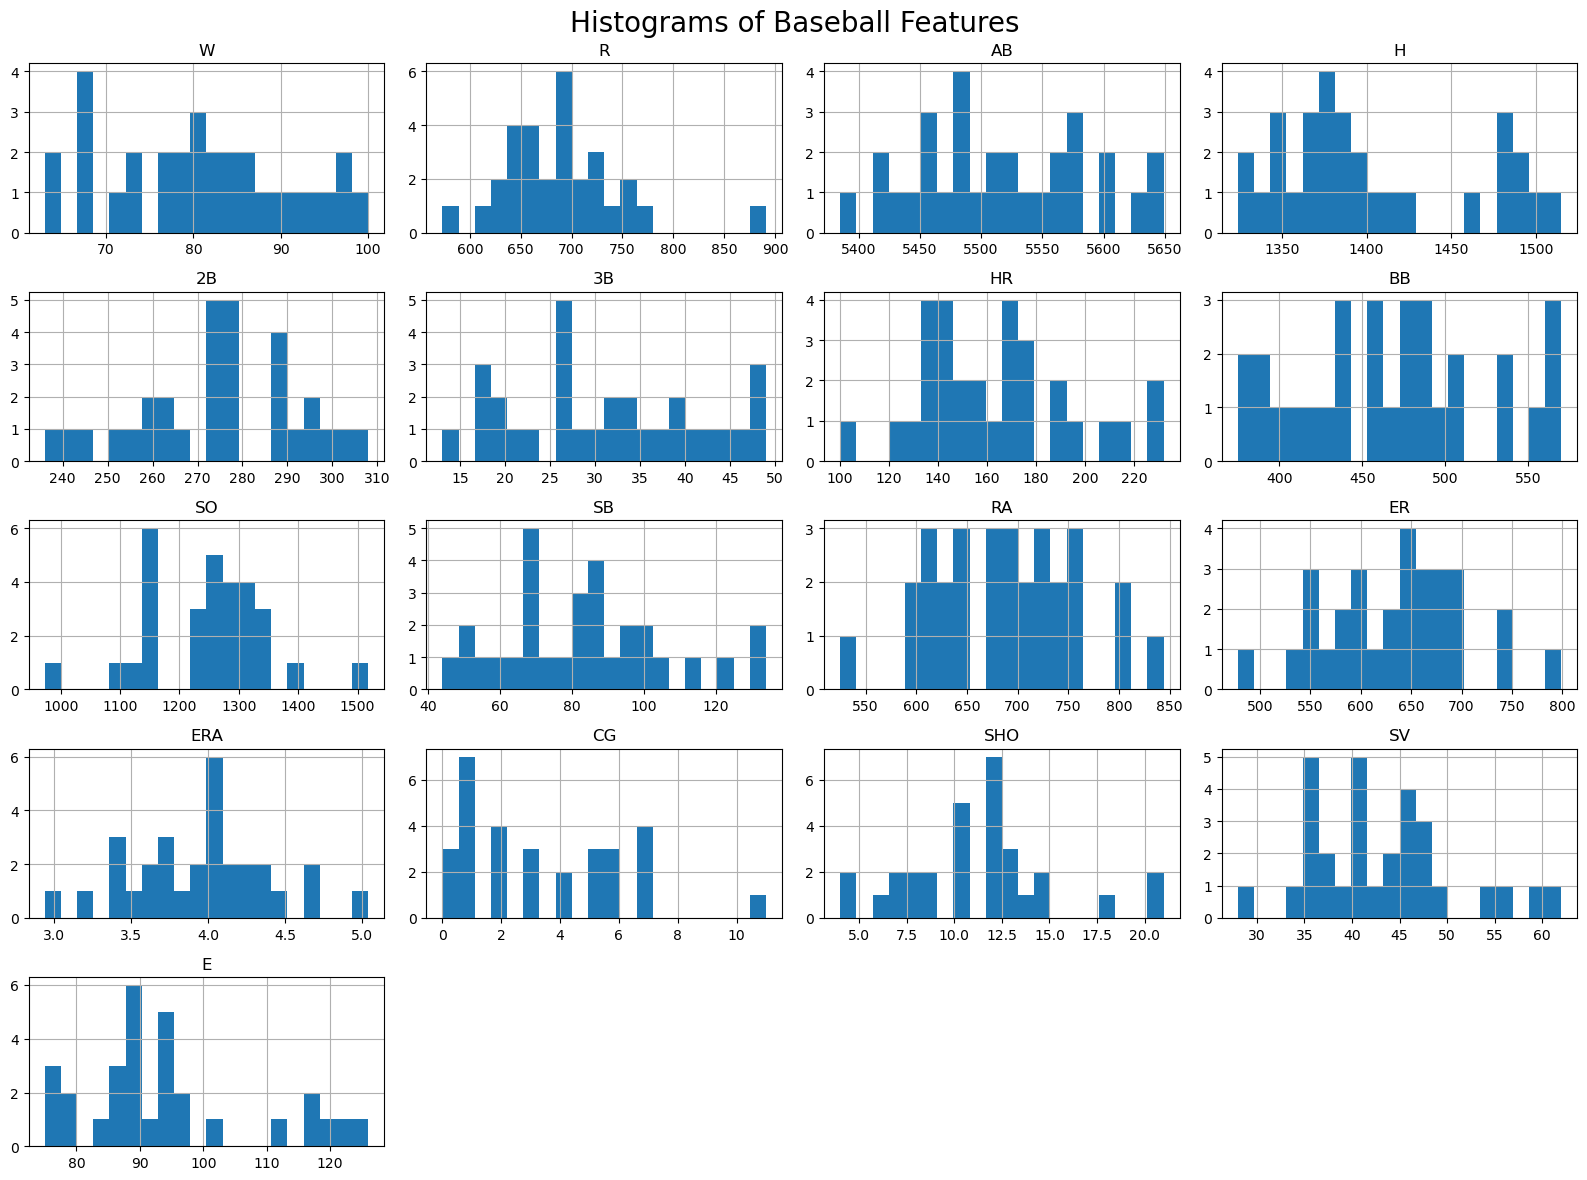

In [11]:
df.hist(bins=20, figsize=(16, 12))
plt.suptitle("Histograms of Baseball Features", fontsize=20)
plt.tight_layout()
plt.show()

Wins (W): Most teams have wins concentrated around the 70-90 range, with few teams exceeding 90 wins.

Runs (R): There's a fairly even distribution of team runs scored, ranging from around 600 to 900, with a slight concentration around 650-750 runs.

At Bats (AB): Teams have at-bats mostly in the range of 5400-5600, showing a common level of offensive opportunities.

Hits (H): Hits are skewed towards the lower range, with most teams achieving between 1350 and 1450 hits.

Doubles (2B), Triples (3B), Home Runs (HR): All show varied distributions with a concentration of values in a middle range, indicating some commonality in extra-base hits achieved by teams.

Strikeouts (SO): Teams tend to have strikeouts mostly distributed between 1100 and 1300, showing a commonality in defensive pitching success.

Stolen Bases (SB): Most teams have stolen bases on the lower end, with a peak below 100.

Runs Allowed (RA), Earned Runs (ER): Both show a spread similar to that of runs scored, implying a balance between offensive and defensive aspects of the games.

Earned Run Average (ERA): Most teams have an ERA between 3.5 and 4.5, with few outliers.

Complete Games (CG): Concentrated towards the lower end, indicating that complete games are less common.

Shutouts (SHO), Saves (SV), and Errors (E): These statistics are skewed towards lower values, suggesting variability with a few teams showing higher frequency.

4. Preprocessing and Feature Engineering

In [12]:
# Feature Selection
features = df[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']]
target = df['W']

# Standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [13]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

5. Model Building and Testing

In [14]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

6. Model Evaluation and Selection

In [15]:
# Evaluate the models using RMSE
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_predictions)))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, gb_predictions)))

# Cross-Validation
print("LR Cross-Validation:", cross_val_score(lr_model, features_scaled, target, cv=5))
print("RF Cross-Validation:", cross_val_score(rf_model, features_scaled, target, cv=5))
print("GB Cross-Validation:", cross_val_score(gb_model, features_scaled, target, cv=5))

Linear Regression RMSE: 5.286116959230819
Random Forest RMSE: 7.184248974898719
Gradient Boosting RMSE: 6.906474758842986
LR Cross-Validation: [ 0.71136471 -2.21099237  0.38808753  0.73556937  0.5797478 ]
RF Cross-Validation: [ 0.23170826 -5.18877786  0.18571843  0.32167768  0.76328509]
GB Cross-Validation: [-0.0991783  -6.67961607  0.22101842  0.27804365  0.50614478]


Linear Regression:
The model has a Root Mean Square Error (RMSE) of 5.286, suggesting the average prediction error is approximately 5.286 units.
Cross-validation scores are quite varied, with one notably negative score, suggesting potential overfitting or poor model performance on at least one fold of the data.

Random Forest Regression:
Higher RMSE of 7.184 compared to Linear Regression indicates less precise predictions on average.
Cross-validation scores show a wide range, including a significantly negative score, hinting at inconsistent model performance across different data subsets.

Gradient Boosting Regression:
RMSE is 6.906, which is lower than Random Forest but higher than Linear Regression, placing it in the middle in terms of prediction error.
Cross-validation results also vary widely, with one particularly negative value, which could indicate issues like poor generalization to new data or model instability.

In conclusion, Linear Regression shows the lowest prediction error and the most stable cross-validation scores among the three models, suggesting it may be the best predictor in this specific context. Both the Random Forest and Gradient Boosting models exhibit higher errors and more variable performance across different data splits. The negative cross-validation scores for all models could be a concern and warrant further investigation into data quality, feature selection, or model configuration.

# Reason to select Linear Regression as the best/final performing model to predict Number of predicted wins (W)
Linear Regression has the lowest RMSE at 5.286, indicating the smallest average deviation between the predicted wins and the actual wins.

Despite one negative score, Linear Regression has demonstrated the most stable cross-validation results, suggesting that it may be less prone to overfitting compared to the other models.

Linear Regression is inherently simpler and more interpretable, which can be advantageous when the model needs to be explained to stakeholders.

In [16]:
# Evaluate the Final Model
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics for the Final Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Evaluation Metrics for the Final Model:
Mean Squared Error (MSE): 27.94
Root Mean Squared Error (RMSE): 5.29
Mean Absolute Error (MAE): 3.89
R-squared (R2): 0.79


The Mean Squared Error (MSE) of 27.94 suggests that, on average, the squared difference between the observed and predicted values is relatively low, but it does not directly convey the average error magnitude due to squaring.

The Root Mean Squared Error (RMSE) of 5.29 is more interpretable as it provides the average error in the same units as the predicted outcome; this value reflects the typical deviation from the actual data points.

The Mean Absolute Error (MAE) of 3.89 is the average absolute difference between observed and predicted values, giving a direct sense of the average prediction error without considering the error direction.

An R-squared (R2) value of 0.79 indicates that approximately 79% of the variability in the dependent variable can be explained by the model, which is a strong fit for many applications.                                                                                                      

Overall, the model shows a good fit and predictive power with a high R-squared value and relatively low error metrics (MSE, RMSE, MAE), suggesting it can reliably estimate the outcome with a typical deviation of around 5.29 units from the actual values.

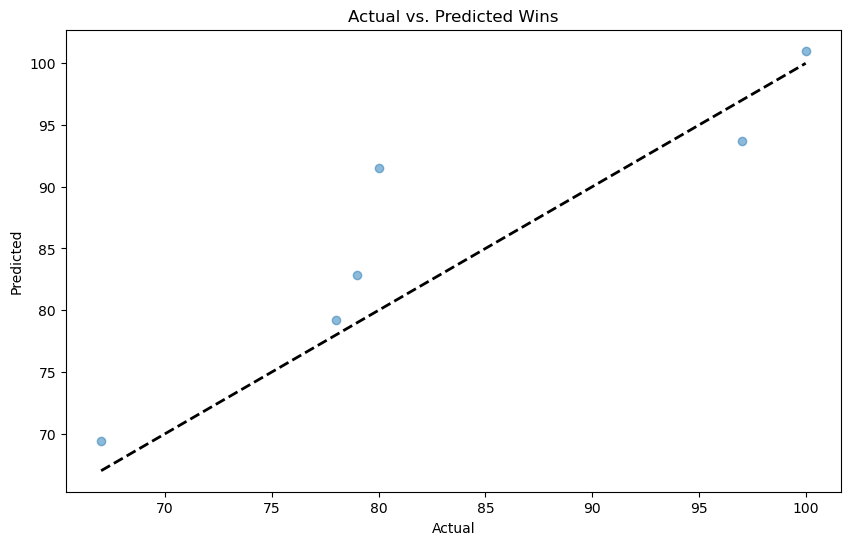

In [17]:
# Visualizing the predictions vs actual outcomes
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Wins')
plt.show()

The majority of predictions are close to the dashed line, which represents perfect accuracy, showing that the model generally predicts well.

There is a cluster of points at the higher end of wins (both actual and predicted), indicating the model's accuracy is consistent for teams with higher numbers of wins.

The model tends to slightly overestimate wins for teams with actual wins in the mid-range (around 80 to 90 wins).

For teams with actual wins around 70, the model underestimates the number of wins, as seen by the point below the line.

Overall, the close alignment of most points to the line of perfect prediction demonstrates the model's strong predictive performance, consistent with the high R-squared value reported earlier.

In [18]:
# Feature Importance Analysis
# Assuming lr_model is a trained Linear Regression model
feature_importance_lr = pd.DataFrame({'Feature': features.columns, 'Coefficient': lr_model.coef_})
feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=False)
print(feature_importance_lr)

   Feature  Coefficient
10      ER    14.588611
14      SV     6.034206
0        R     5.924689
9       RA     4.720792
12      CG     1.546036
13     SHO     1.234917
2        H     1.133085
4       3B     0.164505
8       SB    -0.083572
15       E    -0.130721
7       SO    -0.137582
5       HR    -0.867081
3       2B    -1.067909
6       BB    -1.222782
1       AB    -2.326713
11     ERA   -23.495030


ER (Earned Runs) has the most significant positive effect on the target variable with a coefficient of 14.588611, implying that an increase in earned runs is associated with a large increase in the target.

SV (Saves) and R (Runs) also have substantial positive coefficients, indicating that higher numbers of saves and runs scored are strongly associated with an increase in the target.

RA (Runs Allowed) and CG (Complete Games) have positive coefficients as well, suggesting a smaller yet positive impact on the target.

ERA (Earned Run Average) has the largest negative effect with a coefficient of -23.495030, which means that an increase in ERA is associated with a significant decrease in the target.

Other features like AB (At Bats), BB (Walks), 2B (Doubles), and HR (Home Runs) have negative coefficients, indicating they are inversely related to the target.

# Saving Linear Regression

In [19]:
final_model = LinearRegression()
final_model.fit(X_train, y_train)
from joblib import dump
dump(final_model, 'predicting_wins.joblib')

['predicting_wins.joblib']

In [20]:
from joblib import load
loaded_model = load('predicting_wins.joblib')

# Project Summary
Objective
The project aimed to forecast the number of wins for Major League Baseball (MLB) teams for the 2015 season by leveraging data from the 2014 season. Utilizing a set of 16 distinct features that encapsulate various aspects of game performance, the endeavor sought to employ advanced machine learning techniques to model the intricacies of baseball success accurately.

Data and Preprocessing
The dataset comprised statistics from the 2014 MLB season, including runs scored, hits, home runs, earned run average (ERA), and more, for 30 teams. Initial exploratory data analysis (EDA) revealed no missing values, and features predominantly included integer and floating-point data types. Preprocessing involved standardizing the features to ensure consistent scale across all variables.

Methodology
The project followed a systematic approach, beginning with EDA to understand the dataset's characteristics and distributions. This phase was crucial for identifying patterns, outliers, and the relationships between variables. Following this, feature engineering was conducted to select the most relevant features for the model, enhancing the predictive accuracy.

Three machine learning models were evaluated:

1. Linear Regression: Served as a baseline model to capture linear relationships between features and the number of wins.

2. Random Forest Regressor: An ensemble method was chosen for its ability to handle non-linear relationships and feature interactions.

3. Gradient Boosting Regressor: Selected for its powerful capability to improve on areas where previous models mispredicted, through the sequential addition of weak learners.

Model Evaluation and Selection
Models were assessed based on the Root Mean Squared Error (RMSE), with cross-validation employed to gauge their generalization to unseen data. The Linear Regression model exhibited the lowest RMSE and the most stable cross-validation scores, indicating it as the best performer among the three models tested. Its inherent simplicity and interpretability further underscored its suitability for this predictive task.

Final Model Evaluation
The chosen Linear Regression model demonstrated an RMSE of 5.29, a Mean Absolute Error (MAE) of 3.89, and an R-squared value of 0.79 on the test dataset. These metrics highlighted the model's strong fit and predictive capability, capable of accounting for approximately 79% of the variance in the number of wins.

Feature Importance Analysis
An examination of feature importance revealed that Earned Runs (ER), Saves (SV), and Runs (R) positively influenced the number of wins, while Earned Run Average (ERA) presented a significant negative impact. This analysis provided valuable insights into the specific aspects of game performance that contribute most significantly to team success.

Conclusion
The project successfully developed an algorithm capable of predicting MLB team victories with considerable accuracy, offering insights into the dynamics of team victories. The exploration of feature importance further enriched the understanding of baseball success, guiding teams in strategizing to enhance their performance effectively.